# Mini-Project on Big Data (MPBD)
# ...

## Requirement 1
### Consolidate 5 CSV files into a single CSV file

In [27]:
import pandas as pd

In [28]:
df1 = pd.read_csv("S1.csv")
df2 = pd.read_csv("S2.csv")
df3 = pd.read_csv("S3.csv")
df4 = pd.read_csv("S4.csv")
df5 = pd.read_csv("S5.csv")

In [29]:
df = pd.merge(df1, df2, on='Student', how='left')
df = pd.merge(df, df3, on='Student', how='left')
df = pd.merge(df, df4, on='Student', how='left')
df = pd.merge(df, df5, on='Student', how='left')

In [30]:
df

,Student,L001,V001,V002,V003,V004,V005,V006,V007,L002,...,L004,V019,V020,V021,V022,V023,V024,L005,P001,V025
0,S001,56,82,74,68.0,78,87,63,79,54.0,...,63.0,76.0,70.0,75.0,80.0,70.0,83.0,61.0,72.0,63.0
1,S002,55,31,39,56.0,50,58,51,60,49.0,...,50.0,NaN,71.0,52.0,53.0,47.0,60.0,56.0,NaN,50.0
2,S003,52,83,88,79.0,85,66,62,74,56.0,...,67.0,74.0,69.0,80.0,81.0,79.0,74.0,60.0,64.0,70.0
3,S004,54,34,35,49.0,49,61,61,62,36.0,...,50.0,NaN,60.0,56.0,NaN,43.0,70.0,45.0,NaN,41.0
4,S005,56,74,54,49.0,53,60,54,73,43.0,...,36.0,58.0,60.0,51.0,46.0,52.0,68.0,34.0,54.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,S081,62,82,70,72.0,81,73,55,72,65.0,...,64.0,70.0,70.0,68.0,68.0,78.0,73.0,62.0,61.0,60.0
79,S082,58,85,93,82.0,88,68,65,74,64.0,...,67.0,96.0,72.0,74.0,75.0,90.0,74.0,62.0,70.0,75.0
80,S083,69,57,65,58.0,56,63,67,68,54.0,...,66.0,58.0,64.0,63.0,51.0,57.0,71.0,54.0,66.0,51.0
81,S084,55,79,71,67.0,68,54,67,80,53.0,...,53.0,72.0,63.0,69.0,64.0,64.0,74.0,53.0,59.0,68.0


## Requirement 2
### Count the number of students who completed all 5 semesters

In [31]:
# if the students completed all 5 semesters, then their ID should be in every csv file. Which mean we can use inner join to get the students who completed all 5 semesters
all5SemDF = pd.merge(df1, df2, on='Student', how='inner')
all5SemDF = pd.merge(all5SemDF, df3, on='Student', how='inner')
all5SemDF = pd.merge(all5SemDF, df4, on='Student', how='inner')
all5SemDF = pd.merge(all5SemDF, df5, on='Student', how='inner')

In [32]:
len(all5SemDF)

67

## Requirement 3
### Statistics (mean/ maximum/ minimum/ standard deviation of module marks) of the designated modules - V???, V???, V???

In [33]:
# mean of V001
df['V001'].mean()

64.79518072289157

In [34]:
# maximum value of V002
df['V002'].max()

93

In [35]:
# minimum value of V003
df['V003'].min()

19.0

In [36]:
# standard deviation of V004
df['V004'].std()

21.238891411158047

## Requirement 4
### Histogram of the designated module - V???

In [37]:
import matplotlib.pyplot as plt

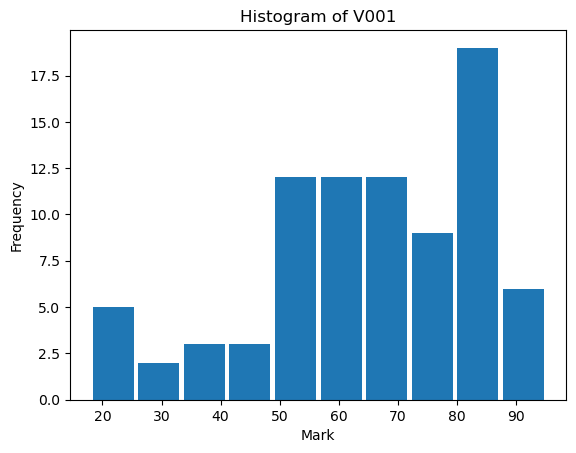

In [38]:
plt.hist(df['V001'], rwidth=0.9) # rwidth is added for the space between the bars, better visibility
plt.xlabel('Mark')
plt.ylabel('Frequency')
plt.title('Histogram of V001')
plt.show()

## Requirement 5 (NOT needed for those who completed Requirement 1)
### Box plot of the designated module - V???

In [39]:
# import matplotlib.pyplot as plt

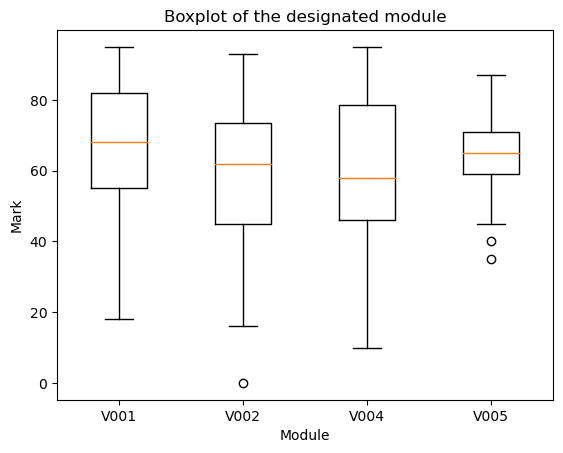

In [40]:
plt.boxplot([df['V001'],df['V002'],df['V004'],df['V005']],labels=['V001','V002','V004','V005'])
plt.ylabel('Mark')
plt.xlabel('Module')
plt.title('Boxplot of the designated module')
plt.show()

## Requirement 6
### Pie chart of the designated module - V???

In [41]:
# import matplotlib.pyplot as plt

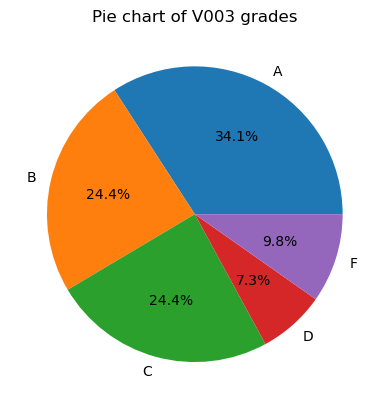

In [42]:
V003GradeA = len(df[df['V003']>=70]['V003'])
V003GradeB = len(df[(df['V003']>=60) & (df['V003']<70)]['V003'])
V003GradeC = len(df[(df['V003']>=50) & (df['V003']<60)]['V003'])
V003GradeD = len(df[(df['V003']>=40) & (df['V003']<50)]['V003'])
V003GradeF = len(df[df['V003']<40]['V003'])
plt.pie([V003GradeA,V003GradeB,V003GradeC,V003GradeD,V003GradeF], labels=['A','B','C','D','F'], autopct='%.1f%%')
plt.title('Pie chart of V003 grades')
plt.show()

## Requirement 7A
### Underlying relationship 1

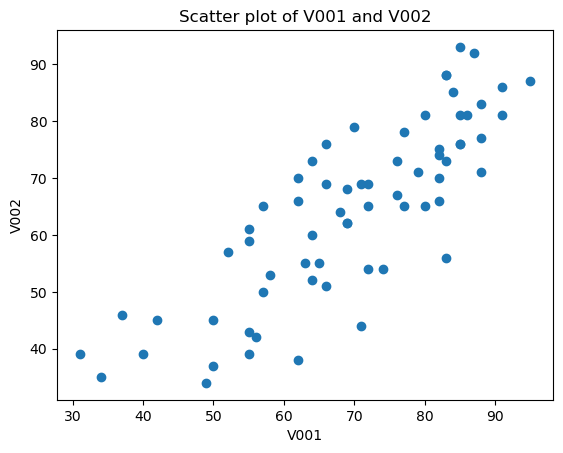

In [43]:
# Underlying relationship between V001 and V002
plt.scatter(all5SemDF['V001'],all5SemDF['V002'])
plt.xlabel('V001')
plt.ylabel('V002')
plt.title('Scatter plot of V001 and V002')
plt.show()

## Requirement 7B
### Underlying relationship 2

Text(0.5, 1.0, 'Scatter plot of LAN and EEE modules')

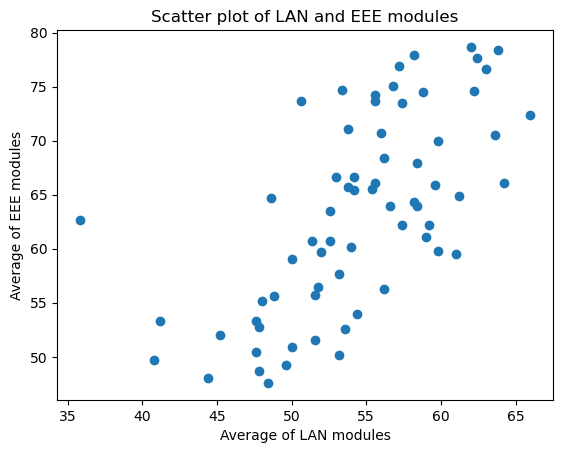

In [44]:
# grab all result of module start with letter L
lDF = all5SemDF.filter(regex='^L')
# grab all result of module start with letter V
vDF = all5SemDF.filter(regex='^V')
### Use all5semDF to avoid outliner that some students did not complete all the courses


# underling relationship between them
plt.scatter(lDF.mean(axis=1),vDF.mean(axis=1))
plt.xlabel('Average of LAN modules')
plt.ylabel('Average of EEE modules')
plt.title('Scatter plot of LAN and EEE modules')